## EDA - Social Media Data Analysis

### Context
You are working for a tech company that manages a social media platform. Your team is responsible for increasing user engagement on the platform. In particular, you are interested in identifying the most successful users and topics on the platform. Success is measured as the level of general engagement (likes, comments, and shares) obtained by a user when they post content.

### Data
You are provided with four datasets displaying information on the posting history of eleven
selected content creators. The content of these datasets is as follows:

#### 1. Post_History.csv

This dataset links the users and their posts. It includes two variables:

• <b>User_ID</b>: Unique identifier of the content creator that made the post. This variable is useful to relate the dataset to Users.csv

• <b>Post_ID</b>: Unique identifier of the post. This variable is useful to relate the dataset to <b>Post_Info1.csv</b> and <b>Post_Info2.csv</b>.

#### 2. Post_Info1.csv
This dataset reports data regarding the content and success of a sample of posts. It includes 
six variables.

• <b>Post_ID</b>: Unique identifier of the post.

• <b>Topic</b>: What is the post about? (there are four options: “Food”, “Travel”, “Gaming” and “Fashion”).

• <b>Date</b>: Date at which the user posted the content on the platform.

• <b>Likes</b>: Number of “likes” obtained from the post.

• <b>Comments</b>: Number of “comments” obtained from the post.

• <b>Shared</b>: Number of times the post has been shared by other users.

#### 3. Post_Info2.csv

This dataset completes Post_Info1.csv. It includes a different sample of posts. The variables are the same as the one described for <b>Post_Info1.csv</b>

#### 4. Users.csv
This dataset reports additional information regarding the eleven content creators whose posts 
are to be analyzed. 

• <b>User_ID</b>: Unique identifier of the content creator.

• <b>Name</b>: Username associated to the account.

• <b>Gender</b>: Declared gender of the content creator (1=he/him; 2=she/her; 3=they/them).

• <b>Age</b>: Age declared by the content creator.

• <b>Country</b>: Country of residence of the content creator (US, UK or Australia).


In [1]:
import pandas as pd
import datetime as dt
import statistics as stat
import seaborn as sb
import matplotlib.pyplot as plt
import os

In [2]:
df_post_history = pd.read_csv('Post_History.csv')
df_post_info1 = pd.read_csv('Post_Info1.csv')
df_post_info2 = pd.read_csv('Post_Info2.csv')
df_users = pd.read_csv('Users.csv')

In [4]:
# Check the shape of each dataframe to make sure that it is correctly loaded.
print('df_post_history.shape:', df_post_history.shape)
print('df_post_info1.shape:', df_post_info1.shape)
print('df_post_info2.shape:', df_post_info2.shape)
print('df_users.shape:', df_users.shape)
#Please do the same all other dataframes.

# Check the top 5 rows of each dataframe to make sure that it is correctly loaded.
print('\ndf_post_history:')
print(df_post_history.head())
print('\ndf_post_info1:')
print(df_post_info1.head())
print('\ndf_post_info2:')
print(df_post_info2.head())
print('\ndf_users:')
print(df_users.head())
# Please do the same for all other dataframes.


df_post_history.shape: (900, 2)
df_post_info1.shape: (378, 6)
df_post_info2.shape: (522, 6)
df_users.shape: (11, 5)

df_post_history:
   User_ID  Post_ID
0      520   269080
1      122   291179
2      252   745975
3      242   350380
4      242   497060

df_post_info1:
   Post_ID    Topic        Date  Likes  Comments  Shared
0   200217   Gaming  2022-02-17   2460        48      36
1   200788   Gaming  2022-10-16   9320        56      15
2   201749   Gaming  2021-02-09  23610        70      27
3   204683     Food  2021-05-08  20930        80      47
4   205080  Fashion  2021-09-19  19200       163      79

df_post_info2:
   Post_ID    Topic        Date   Likes  Comments  Shared
0   500095     Food  2021-04-17  115180       230     311
1   500206   Travel  2022-07-05   16760       183     132
2   500797     Food  2021-01-17  116060       566     467
3   501739  Fashion  2022-04-20   76760       157     201
4   502180     Food  2022-04-09   23230       119      29

df_users:
   User_ID   

### Data Preparation and Cleaning

#### 1. Combine the df_post_info1, df_post_info2

In [80]:
all_post = pd.concat([df_post_info1, df_post_info2])
print('df_post_info1.shape:', df_post_info1.shape)
print('df_post_info2.shape:', df_post_info2.shape)
print('all_post.shape:', all_post.shape)

df_post_info1.shape: (378, 6)
df_post_info2.shape: (522, 6)
all_post.shape: (900, 6)


#### 2. Check whether there is any null values or NaN values in the dataset

In [81]:
print(df_post_history.isnull().values.any())
print(all_post.isnull().values.any())
print(df_users.isnull().values.any())

False
False
False


#### 3. Check unique value of categorical columns

In [82]:
print(all_post['Topic'].unique())
print(df_users['Country'].unique())
print(df_users['Gender'].unique())

['Gaming' 'Food' 'Fashion' 'Travel' 'Travek']
['UK' 'US' 'AUS']
[1 2 3]


### We can see that there are some error of topic column.Hence, we need to replace the "travek" by "travel"

In [83]:
all_post['Topic'] = all_post['Topic'].replace('Travek', 'Travel')

In [84]:
print(all_post['Topic'].unique())

['Gaming' 'Food' 'Fashion' 'Travel']


### Mission

The analysis should consider all posts and the available information for each post. You will therefore need to merge the datasets.

#### Objective 1: Which users build the most engagement? 

Each post can be liked, shared, and commented. Calculate the “engagement” metric for each post as follow: 

<b>𝑒𝑛𝑔𝑎𝑔𝑒𝑚𝑒𝑛𝑡 = 0.2 × 𝑙𝑖𝑘𝑒𝑠 + 0.3 × 𝑐𝑜𝑚𝑚𝑒𝑛𝑡𝑠 + 0.5 × 𝑠ℎ𝑎𝑟𝑒𝑑. </b>

This is a weighted average which summarizes the three components of engagement by taking into account their importance for the company.

<b>Please identify the name of the five users who have the highest average engagement per post.</b>


In [85]:
merged_with_post_history = all_post.merge(df_post_history, on='Post_ID')
merged_with_post_history_with_users = merged_with_post_history.merge(df_users, on='User_ID')
print('merged_with_post_history.shape:', merged_with_post_history.shape)
print('merged_with_post_history_with_users.shape:', merged_with_post_history_with_users.shape)
print(merged_with_post_history_with_users.head())


merged_with_post_history.shape: (900, 7)
merged_with_post_history_with_users.shape: (900, 11)
   Post_ID    Topic        Date  Likes  Comments  Shared  User_ID  \
0   200217   Gaming  2022-02-17   2460        48      36      242   
1   200788   Gaming  2022-10-16   9320        56      15      242   
2   201749   Gaming  2021-02-09  23610        70      27      242   
3   204683     Food  2021-05-08  20930        80      47      451   
4   205080  Fashion  2021-09-19  19200       163      79      250   

           Name  Gender  Age Country  
0    Crash Test       1   39      UK  
1    Crash Test       1   39      UK  
2    Crash Test       1   39      UK  
3  El0nMusk_off       3   99      US  
4      AIRBDEEM       2   23      US  


In [86]:
final_merged = merged_with_post_history_with_users

final_merged['Engagement'] = 0.2 * final_merged['Likes'] + 0.3 * final_merged['Comments'] + 0.5 * final_merged['Shared']
print(final_merged)


     Post_ID    Topic        Date  Likes  Comments  Shared  User_ID  \
0     200217   Gaming  2022-02-17   2460        48      36      242   
1     200788   Gaming  2022-10-16   9320        56      15      242   
2     201749   Gaming  2021-02-09  23610        70      27      242   
3     204683     Food  2021-05-08  20930        80      47      451   
4     205080  Fashion  2021-09-19  19200       163      79      250   
..       ...      ...         ...    ...       ...     ...      ...   
895   897931     Food  2022-11-02  67080       214     164      311   
896   898659     Food  2022-04-01  20350       145      27      250   
897   899245     Food  2022-11-12  20960       594     104      545   
898   899692   Gaming  2022-01-16  55200       267      81      311   
899   899976   Gaming  2022-08-09   8410        47      20      242   

               Name  Gender  Age Country  Engagement  
0        Crash Test       1   39      UK       524.4  
1        Crash Test       1   39     

In [87]:
per_user_engagement = final_merged.groupby('User_ID')['Engagement'].mean().reset_index()
print(per_user_engagement)

    User_ID    Engagement
0        56  12837.298630
1        66   4849.636667
2       120   3037.706000
3       122   3134.243750
4       242   2838.125123
5       250   5755.087736
6       252   3316.622222
7       311  10125.564103
8       451   5487.058170
9       520  14838.263636
10      545  14532.916832


In [88]:
user_engagement = per_user_engagement.merge(df_users[['User_ID', 'Name']], on='User_ID')
print(user_engagement)

    User_ID    Engagement            Name
0        56  12837.298630      Jumbo Jack
1        66   4849.636667      VeganChloe
2       120   3037.706000       Not Alice
3       122   3134.243750    Etienne Faux
4       242   2838.125123      Crash Test
5       250   5755.087736        AIRBDEEM
6       252   3316.622222    Vogue Xtreme
7       311  10125.564103         Major L
8       451   5487.058170    El0nMusk_off
9       520  14838.263636      Fancy Tina
10      545  14532.916832  Carlor Ferrero


In [89]:
top_5_users = user_engagement.sort_values(by='Engagement', ascending=False).head(5)
print(top_5_users)

    User_ID    Engagement            Name
9       520  14838.263636      Fancy Tina
10      545  14532.916832  Carlor Ferrero
0        56  12837.298630      Jumbo Jack
7       311  10125.564103         Major L
5       250   5755.087736        AIRBDEEM


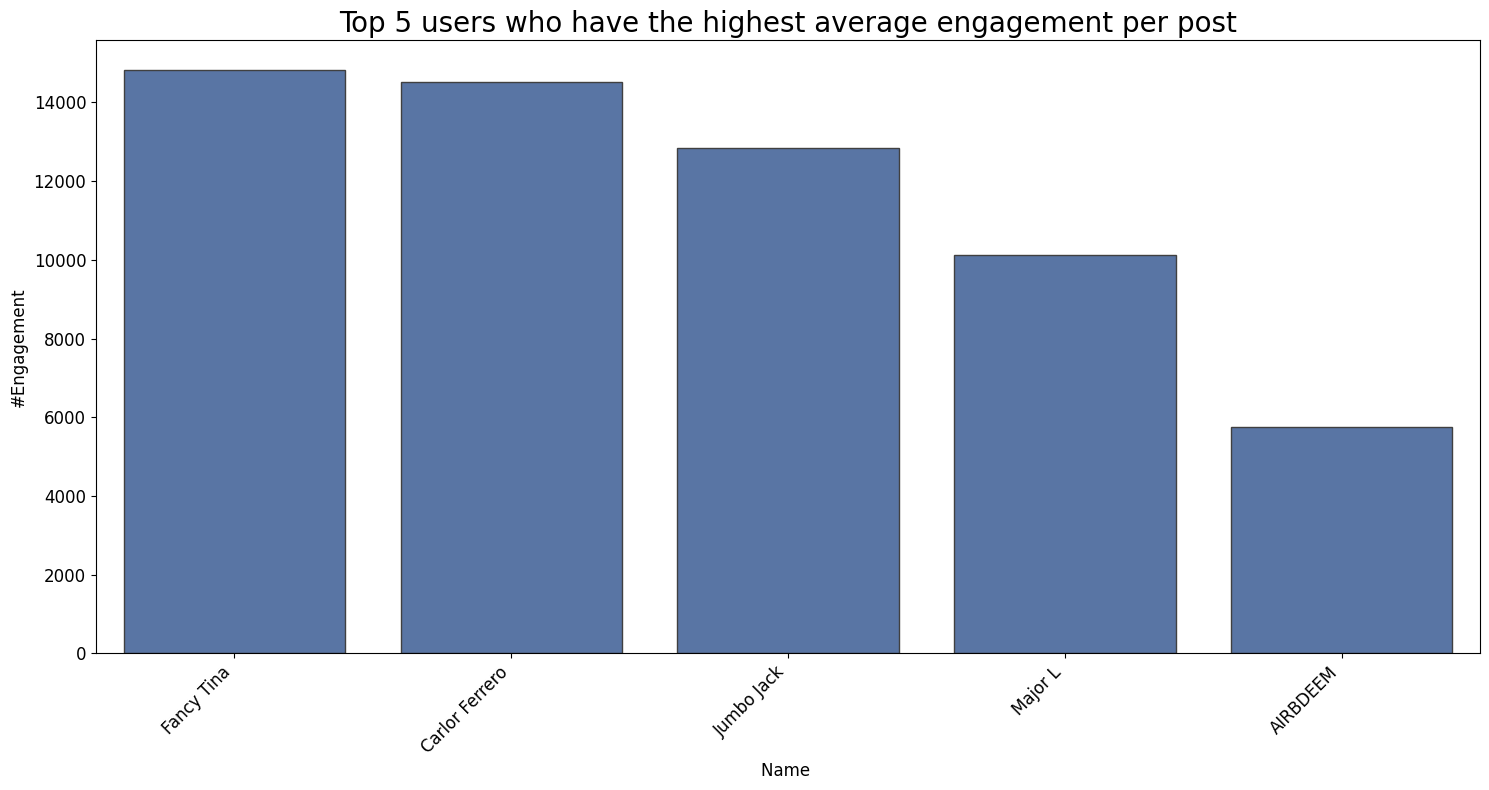

In [90]:
palette_color = sb.color_palette('deep')[0]
plt.figure(figsize=(15,8))
sb.barplot(data=top_5_users, x='Name', y='Engagement',
                 color=palette_color, edgecolor='0.25')
plt.title('Top 5 users who have the highest average engagement per post', fontsize=20)
plt.ylabel('#Engagement', fontsize=12)
plt.xlabel('Name ', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

#### Objective 2: What are the specialties of each user in the content they create?

Each user may specialize on a topic, and audience may vary between topics. For commercial purpose (e.g., recommending an influencer to a brand), it would be important to identify which user is the more suited for a given topic. 

<b>Please identify the specialties of the eleven users. </b>

<b>Ideas:</b>

• You can for instance use the topic of their posts and identify how often they publish in different topics. 

• You could represent this information in a graph of your choice (making eleven graphs in total). 

• Another way to define the specialties would be to calculate the total engagement obtained from the different topics.

In [91]:
final_merged

,Post_ID,Topic,Date,Likes,Comments,Shared,User_ID,Name,Gender,Age,Country,Engagement
0,200217,Gaming,2022-02-17,2460,48,36,242,Crash Test,1,39,UK,524.4
1,200788,Gaming,2022-10-16,9320,56,15,242,Crash Test,1,39,UK,1888.3
2,201749,Gaming,2021-02-09,23610,70,27,242,Crash Test,1,39,UK,4756.5
3,204683,Food,2021-05-08,20930,80,47,451,El0nMusk_off,3,99,US,4233.5
4,205080,Fashion,2021-09-19,19200,163,79,250,AIRBDEEM,2,23,US,3928.4
...,...,...,...,...,...,...,...,...,...,...,...,...
895,897931,Food,2022-11-02,67080,214,164,311,Major L,1,21,AUS,13562.2
896,898659,Food,2022-04-01,20350,145,27,250,AIRBDEEM,2,23,US,4127.0
897,899245,Food,2022-11-12,20960,594,104,545,Carlor Ferrero,1,50,US,4422.2
898,899692,Gaming,2022-01-16,55200,267,81,311,Major L,1,21,AUS,11160.6


In [101]:
user_topic_counts = final_merged.groupby(['Name', 'Topic']).size()
user_topic_counts

Name            Topic  
AIRBDEEM        Fashion     26
                Food        23
                Gaming       8
                Travel      49
Carlor Ferrero  Fashion      9
                Food        76
                Gaming      10
                Travel       6
Crash Test      Fashion     18
                Food        45
                Gaming     117
                Travel      23
El0nMusk_off    Fashion     33
                Food        92
                Gaming      15
                Travel      13
Etienne Faux    Fashion      2
                Food         8
                Travel       6
Fancy Tina      Fashion     17
                Food         7
                Travel       9
Jumbo Jack      Fashion     11
                Food        13
                Gaming       8
                Travel      41
Major L         Fashion      7
                Food        21
                Gaming      78
                Travel      11
Not Alice       Fashion     22
               

#### Objective 3: Your initiatives.

In the time that remains, please provide any additional analysis using the data. For example, <b>correlations</b> between likes, comments and shares (is the one getting the more likes also getting the most shares?), the country of origin, the gender, the distinction between 2021 and 2022… Anything that you think could be interesting. 

It does not matter if the results are interesting or not (e.g., if you do not find effects or differences between groups), as long as it is well done. 

<b>Some advice</b>: Do not try to talk about everything if you do not have time. Quality should be prioritized over quantity. Managing your time in accordance with your degree of familiarity with Python is an important skill. You do not need to be exhaustive to score perfectly.